In [305]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Color Coding

In [384]:
color_mapping = {
    'darkred': 'darkred',
    'darkgrey': 'darkgrey',
    'chocolate': 'chocolate',
    'lightsalmon': 'lightsalmon',
    'rosybrown': 'rosybrown',
    'salmon': 'salmon',
    'mistyrose': 'midnightblue',  # Alternative to mistyrose
    'saddlebrown': 'saddlebrown',
    'black': 'black',
    'peru': 'peru',
    'linen': 'khaki',  # Alternative to linen
    'dimgrey': 'dimgrey',
    'seashell': 'skyblue',  # Alternative to seashell
    'sienna': 'sandybrown',  # A lighter, more orange-toned alternative to sienna
    'red': 'crimson',  # A deeper, more vivid red than the standard "red"
    'orangered': 'coral',  # A softer, less intense option compared to orangered
    'maroon': 'firebrick',  # A brighter, more distinguishable shade compared to maroon
    'tomato': 'indianred'  # A more subdued, earthy alternative to tomato
}

## modules used in Cluster Profiles over time

In [385]:
#modules = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_wgcna_MEs.csv", sep=",", index_col='ref')
modules_orig = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_wgcna_MEs.csv", sep=",")



In [386]:
modules_orig.columns

Index(['ref', 'MEdarkred', 'MEsalmon', 'MEsienna', 'MEdarkgrey', 'MEchocolate',
       'MElightsalmon', 'MErosybrown', 'MEred', 'MEsaddlebrown', 'MEblack',
       'MEmaroon', 'MEtomato', 'MEperu', 'MElinen', 'MEorangered',
       'MEmistyrose', 'MEdimgrey', 'MEseashell'],
      dtype='object')

#### strip away the ME

In [387]:
modules_orig.columns = [col if not col.startswith('ME') else col[2:] for col in modules_orig.columns]
modules_orig.columns


Index(['ref', 'darkred', 'salmon', 'sienna', 'darkgrey', 'chocolate',
       'lightsalmon', 'rosybrown', 'red', 'saddlebrown', 'black', 'maroon',
       'tomato', 'peru', 'linen', 'orangered', 'mistyrose', 'dimgrey',
       'seashell'],
      dtype='object')

##### Convert very light colors


In [388]:
modules = modules_orig.copy()

modules.columns = ['ref' if col == 'ref' else color_mapping[col] for col in modules.columns]
modules.columns

Index(['ref', 'darkred', 'salmon', 'sandybrown', 'darkgrey', 'chocolate',
       'lightsalmon', 'rosybrown', 'crimson', 'saddlebrown', 'black',
       'firebrick', 'indianred', 'peru', 'khaki', 'coral', 'midnightblue',
       'dimgrey', 'skyblue'],
      dtype='object')

## clusters, used in Clusters Populations and Orphan ratio

In [389]:
with open("/home/t44p/PW_rawdata/wgcna_clusters.json", 'r') as json_file:
    clusters_orig = json.load(json_file)
clusters_orig.keys()

dict_keys(['black', 'chocolate', 'darkgrey', 'darkred', 'dimgrey', 'lightsalmon', 'linen', 'maroon', 'mistyrose', 'orangered', 'peru', 'red', 'rosybrown', 'saddlebrown', 'salmon', 'seashell', 'sienna', 'tomato'])

In [390]:
clusters = {color_mapping[key]: value for key, value in clusters_orig.items() if key in color_mapping}
clusters.keys()

dict_keys(['black', 'chocolate', 'darkgrey', 'darkred', 'dimgrey', 'lightsalmon', 'khaki', 'firebrick', 'midnightblue', 'coral', 'peru', 'crimson', 'rosybrown', 'saddlebrown', 'salmon', 'skyblue', 'sandybrown', 'indianred'])

# Are All orphans part of the Transcriptome Data ?

Here we Determine the genes that were expressed in the experiment

In [391]:
# Load GFF Genome Annotation
gff_file = '/home/t44p/PW_rawdata/Transciptome_GenomeAnnotation/Xele_annotated2_gff_export2.gff'
gff_genes = []

with open(gff_file, 'r') as file:
    for line in file:
                if not line.lstrip().startswith('#'):
                    gff_genes.append(line.split('\t')[0])


In [392]:
# Load expression data set (ML feature matrix)
tr_mut = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_mut.csv", sep=",")
expressed = tr_mut['ref']


In [393]:
# Load orphan genes
orphans = open("/home/t44p/PW_rawdata/results/full_lasso/orphan.txt", "r") 
data = orphans.read()
orph_list = data.replace('\n', '\s').split("\s") 

# printing the data 
orphans.close() 

In [394]:
not_express = set(gff_genes).difference(set(expressed))

In [395]:
not_expr_orph = set(not_express).intersection(set(orph_list))
not_expr_orph2 = set(orph_list).difference(set(expressed))
expr_orph = set(orph_list).intersection(set(expressed))


In [396]:

print(f"{len(gff_genes)} genes in GFF file")
print(f"{len(set(tr_mut['ref']))} expressed genes")
print(f"{len(not_express)} were not expressed")
print(f"{len(orph_list)} orphan genes") 
print(f"# expressed orphans {len(expr_orph)}\n # orphans not expressed {len(not_expr_orph)}=={len(not_expr_orph2)}")
print(f"{len(not_expr_orph)}+{len(expr_orph)}={len(expr_orph)+len(not_expr_orph)}")

30522 genes in GFF file
23565 expressed genes
6957 were not expressed
4333 orphan genes
# expressed orphans 1423
 # orphans not expressed 2910==2910
2910+1423=4333


# Clusters Populations and Orphan ratio

In [397]:
clusters

{'black': ['Xele.ptg000045l.144',
  'Xele.ptg000011l.64',
  'Xele.ptg000011l.508',
  'Xele.ptg000011l.618',
  'Xele.ptg000037l.121',
  'Xele.ptg000037l.148',
  'Xele.ptg000037l.238',
  'Xele.ptg000037l.241',
  'Xele.ptg000010l.16',
  'Xele.ptg000018l.210',
  'Xele.ptg000018l.528',
  'Xele.ptg000018l.2166',
  'Xele.ptg000016l.71',
  'Xele.ptg000016l.338',
  'Xele.ptg000016l.411',
  'Xele.ptg000001l.419',
  'Xele.ptg000041l.176',
  'Xele.ptg000041l.236',
  'Xele.ptg000020l.501',
  'Xele.ptg000020l.557',
  'Xele.ptg000007l.1',
  'Xele.ptg000007l.176',
  'Xele.ptg000007l.473',
  'Xele.ptg000049l.18',
  'Xele.ptg000049l.93',
  'Xele.ptg000049l.167',
  'Xele.ptg000049l.492',
  'Xele.ptg000012l.835',
  'Xele.ptg000012l.1059',
  'Xele.ptg000012l.1078',
  'Xele.ptg000077l.24',
  'Xele.ptg000044l.139',
  'Xele.ptg000044l.244',
  'Xele.ptg000044l.297',
  'Xele.ptg000044l.718',
  'Xele.ptg000028l.393',
  'Xele.ptg000002l.173',
  'Xele.ptg000002l.477',
  'Xele.ptg000048l.22',
  'Xele.ptg000054l.5',

In [398]:
tr = 0
for cl in clusters.keys():
    #print(len(clusters[cl]))
    tr=tr+len(clusters[cl])

print(f"{tr} total genes in cluster, (should be equal to genes in original feature matrix)")

23565 total genes in cluster, (should be equal to genes in original feature matrix)


In [399]:
cluster_pop = {}
print("ration of expressed orphans in cluster")
d = 0
for cl in clusters.keys():
    c = 0
    for e in clusters[cl]:
        if e in orph_list:
            c+=1
    print(f"{cl} {c}/{len(clusters[cl])}")
    cluster_pop[cl] = [c, len(clusters[cl])]
    
    d = d+c
print(d)

ration of expressed orphans in cluster
black 6/101
chocolate 19/628
darkgrey 192/2453
darkred 14/230
dimgrey 362/4729
lightsalmon 134/2989
khaki 192/1693
firebrick 18/463
midnightblue 168/3907
coral 28/865
peru 3/110
crimson 9/180
rosybrown 8/222
saddlebrown 132/2548
salmon 40/276
skyblue 73/1636
sandybrown 22/370
indianred 3/165
1423


In [400]:
cluster_pop

{'black': [6, 101],
 'chocolate': [19, 628],
 'darkgrey': [192, 2453],
 'darkred': [14, 230],
 'dimgrey': [362, 4729],
 'lightsalmon': [134, 2989],
 'khaki': [192, 1693],
 'firebrick': [18, 463],
 'midnightblue': [168, 3907],
 'coral': [28, 865],
 'peru': [3, 110],
 'crimson': [9, 180],
 'rosybrown': [8, 222],
 'saddlebrown': [132, 2548],
 'salmon': [40, 276],
 'skyblue': [73, 1636],
 'sandybrown': [22, 370],
 'indianred': [3, 165]}

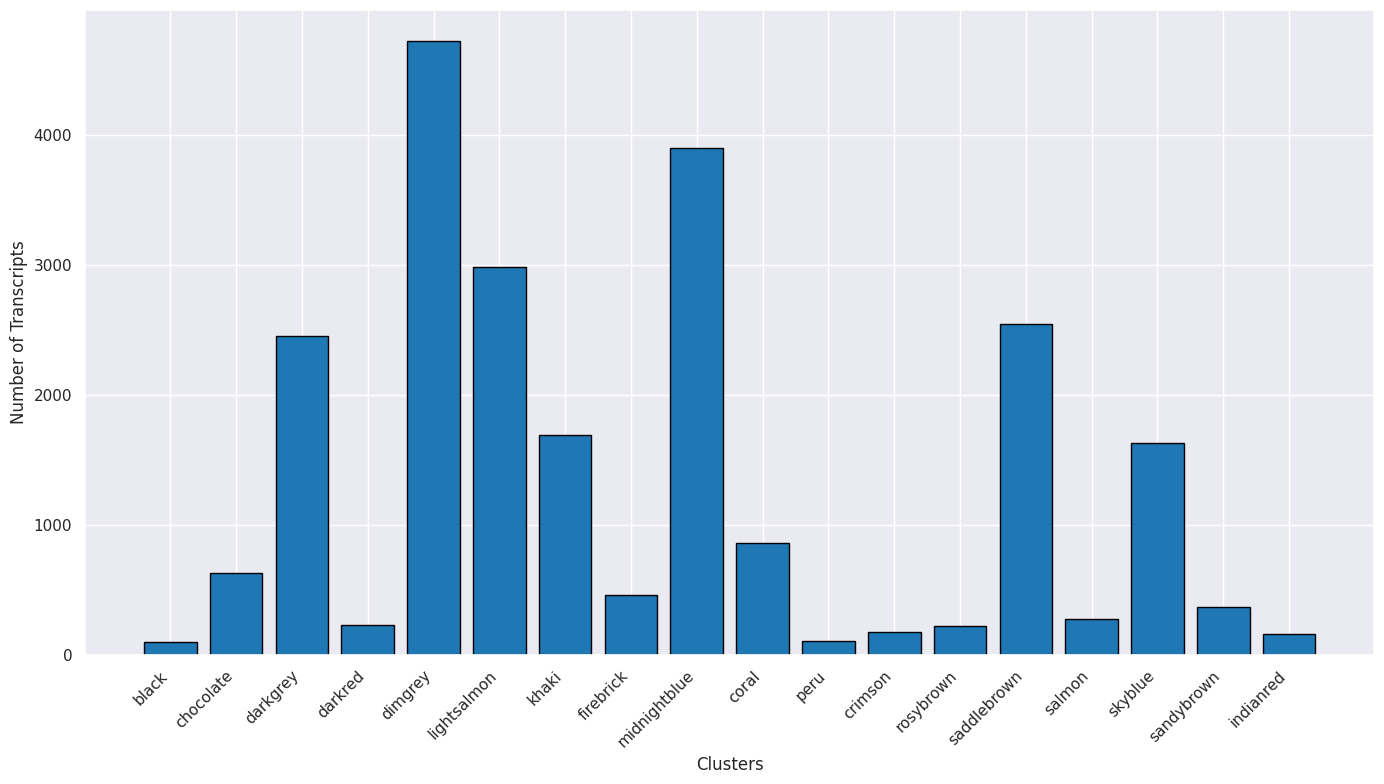

In [401]:
# Extracting keys and values for plotting
keys = list(clusters.keys())
values = [len(clusters[key]) for key in keys]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(keys, values, color='#1f77b4', edgecolor='black')
plt.xlabel('Clusters')
plt.ylabel('Number of Transcripts')
plt.xticks(rotation=45, ha="right")
#plt.title('Module Counts')
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()


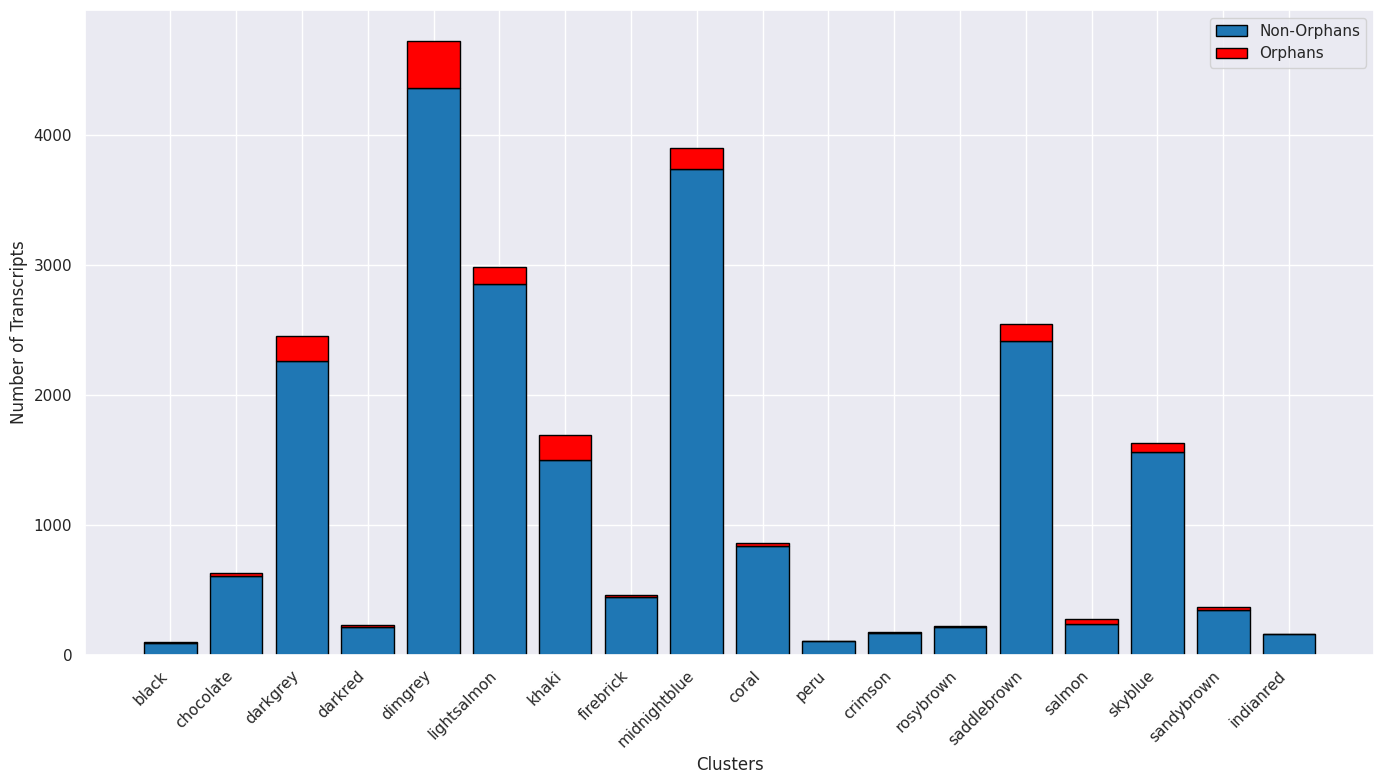

In [402]:
keys = list(clusters.keys())
total_values = [cluster_pop[key][1] for key in keys]
orphan_values = [cluster_pop[key][0] for key in keys]
non_orphan_values = [total - orphan for total, orphan in zip(total_values, orphan_values)]

plt.figure(figsize=(14, 8))

# plot non-orphans
plt.bar(keys, non_orphan_values, color='#1f77b4', edgecolor='black', label='Non-Orphans')

# plot orphans on top
plt.bar(keys, orphan_values, bottom=non_orphan_values, color='red', edgecolor='black', label='Orphans')

plt.xlabel('Clusters')
plt.ylabel('Number of Transcripts')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()

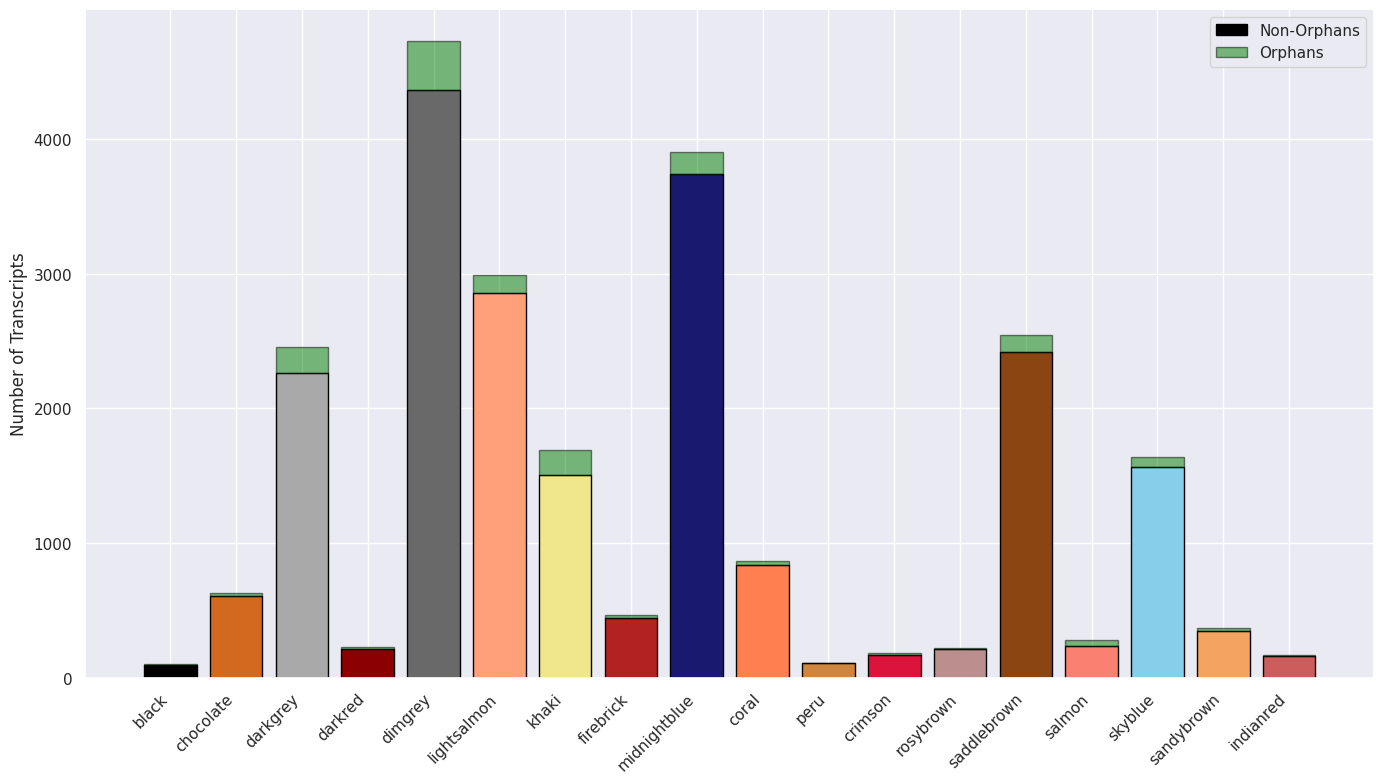

In [403]:
plt.figure(figsize=(14, 8))

for i, (cluster, (orphans, total)) in enumerate(cluster_pop.items()):
    non_orphans = total - orphans
    #  non-orphans in corresponding color, slightly darker for visibility
    plt.bar(i, non_orphans, color=cluster, edgecolor='black', label='Non-Orphans' if i == 0 else "") 
    #  orphans slightly lighter color with alpha = ... 
    plt.bar(i, orphans, bottom=non_orphans, color='green', alpha=0.5, edgecolor='black', label='Orphans' if i == 0 else "")

plt.xticks(range(len(clusters)), clusters.keys(), rotation=45, ha="right")
plt.ylabel('Number of Transcripts')
plt.legend()
plt.tight_layout()
plt.show()

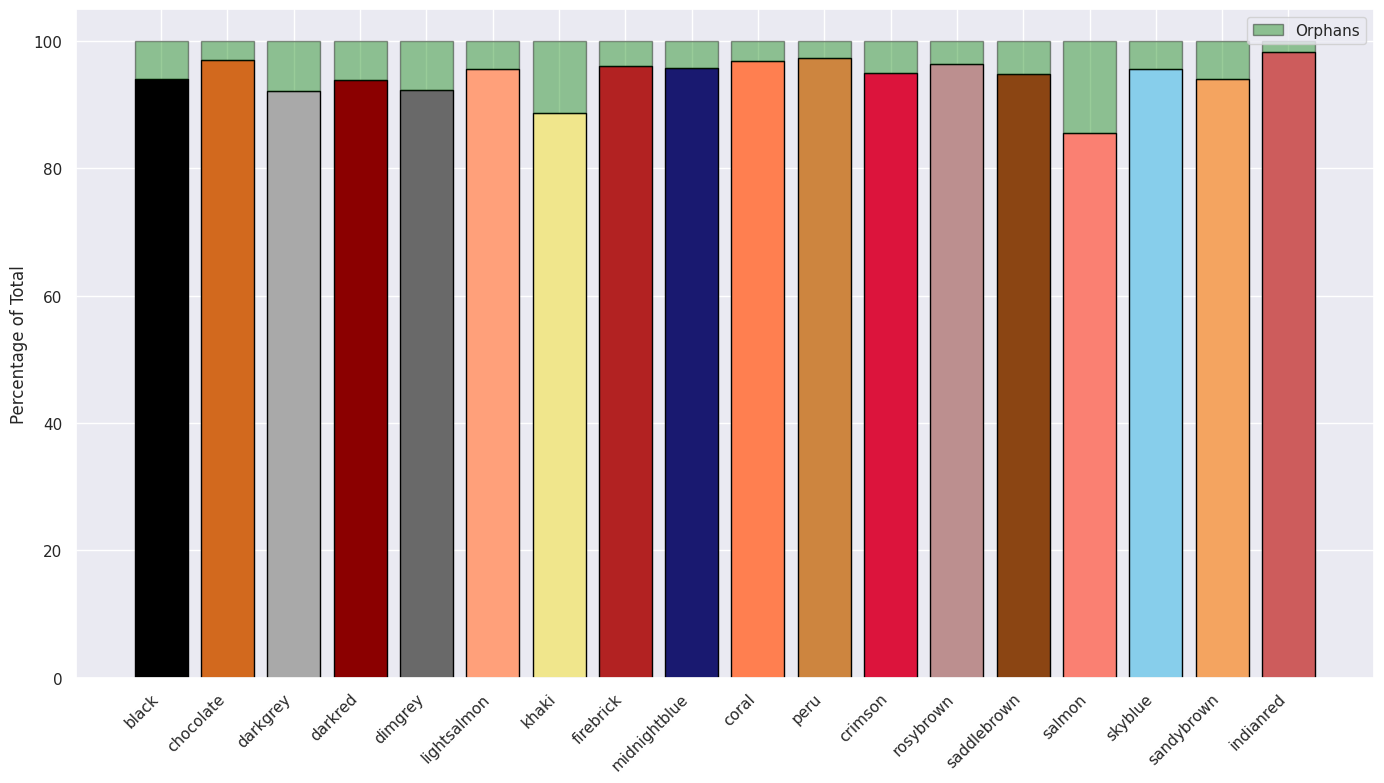

In [404]:
plt.figure(figsize=(14, 8))

for i, (cluster, (orphans, total)) in enumerate(cluster_pop.items()):
    percentage_orphans = (orphans / total) * 100
    percentage_non_orphans = 100 - percentage_orphans
    
    # Plot non-orphans as percentage
    #plt.bar(i, percentage_non_orphans, color=cluster, edgecolor='black', label='Non-Orphans' if i == 0 else "")
    plt.bar(i, percentage_non_orphans, color=cluster, edgecolor='black')

    # Plot orphans on top as percentage
    plt.bar(i, percentage_orphans, bottom=percentage_non_orphans, color='green', alpha=0.4, edgecolor='black', label='Orphans' if i == 0 else "")

plt.xticks(range(len(clusters)), clusters.keys(), rotation=45, ha="right")
plt.ylabel('Percentage of Total')
plt.legend()
plt.tight_layout()
plt.show()

## Cluster Profiles over time

## Median For each Series Timpoint over replicates

In [405]:
"""de_t0 = rep_med[rep_med['Series']== 'De'].copy()
de_t0 = de_t0[de_t0['TPoint']==0].copy()
de_t0 = de_t0[numeric_cols].median(axis=0)
de_t0

de_t3 = rep_med[rep_med['Series']== 'De'].copy()
de_t3 = de_t3[de_t3['TPoint']==3].copy()
de_t3 = de_t3[numeric_cols].median(axis=0)

de_t3

de_t6 = rep_med[rep_med['Series']== 'De'].copy()
de_t6 = de_t6[de_t6['TPoint']==6].copy()
de_t6 = de_t6[numeric_cols].median(axis=0)
de_t6"""

"de_t0 = rep_med[rep_med['Series']== 'De'].copy()\nde_t0 = de_t0[de_t0['TPoint']==0].copy()\nde_t0 = de_t0[numeric_cols].median(axis=0)\nde_t0\n\nde_t3 = rep_med[rep_med['Series']== 'De'].copy()\nde_t3 = de_t3[de_t3['TPoint']==3].copy()\nde_t3 = de_t3[numeric_cols].median(axis=0)\n\nde_t3\n\nde_t6 = rep_med[rep_med['Series']== 'De'].copy()\nde_t6 = de_t6[de_t6['TPoint']==6].copy()\nde_t6 = de_t6[numeric_cols].median(axis=0)\nde_t6"

In [406]:
rep_med = modules.copy()
# Extract series, replicate, and timepoint
rep_med['Series'] = rep_med['ref'].apply(lambda x: x.split('_')[1])
rep_med['Replicate'] = rep_med['ref'].apply(lambda x: x.split('_')[2])
rep_med['TPoint'] = rep_med['ref'].apply(lambda x: x.split('_')[3])
numeric_cols = rep_med.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)
#convert TPoint to numeric for sorting and comparison if not purely numeric handle conversion accordingly
#rep_med['TPoint'] = rep_med['TPoint'].str.extract('(\d+)').astype(int)
rep_med.columns
rep_med.set_index(['Series', 'Replicate', 'TPoint'], inplace=True)
median_df = rep_med.groupby(level=['Series', 'TPoint'])[numeric_cols].median().copy().reset_index()
median_df['ref'] = median_df['Series'] + '_' + median_df['TPoint'].astype(str)
median_df.drop(columns=['Series','TPoint'], inplace=True)
median_df


['darkred', 'salmon', 'sandybrown', 'darkgrey', 'chocolate', 'lightsalmon', 'rosybrown', 'crimson', 'saddlebrown', 'black', 'firebrick', 'indianred', 'peru', 'khaki', 'coral', 'midnightblue', 'dimgrey', 'skyblue']


,darkred,salmon,sandybrown,darkgrey,chocolate,lightsalmon,rosybrown,crimson,saddlebrown,black,firebrick,indianred,peru,khaki,coral,midnightblue,dimgrey,skyblue,ref
0,-0.070542,0.244332,0.014488,0.526131,0.045214,0.109552,-0.034818,0.215168,0.221339,-0.095037,-0.080393,0.045795,-0.086645,0.096628,-0.136449,-0.121119,-0.095649,-0.143420,De_T00
1,0.457305,0.225758,-0.133325,0.017875,-0.005973,-0.000490,0.122773,0.050396,0.269496,0.099744,0.004791,0.074530,-0.091083,-0.087608,-0.203936,0.053710,-0.169480,-0.107959,De_T03
2,0.048077,0.143529,0.042809,0.026465,0.337999,0.101275,0.353547,0.251380,0.197550,0.035692,0.163208,0.063052,-0.267180,-0.273692,-0.164559,-0.044112,-0.138183,-0.150169,De_T06
3,-0.033516,0.003977,-0.030147,-0.068341,0.123265,0.098445,0.256827,0.011184,0.069849,-0.051882,0.224750,0.147749,-0.063381,-0.057019,0.120561,-0.034521,-0.145125,-0.129996,De_T09
4,0.001229,0.135629,-0.228015,-0.144908,-0.204040,-0.152357,-0.064523,-0.114863,-0.052532,-0.055919,0.116014,0.246952,0.002361,-0.013212,0.110194,0.394282,-0.104452,0.175450,De_T12
5,-0.052702,0.105484,-0.206546,-0.123092,-0.190573,-0.172798,-0.102553,-0.123268,-0.119111,-0.033808,-0.010624,0.074200,0.098685,-0.008002,-0.038195,0.266683,-0.017549,0.210516,De_T15
6,-0.104628,0.164637,-0.183961,-0.081815,-0.178272,-0.157858,-0.128265,-0.140250,-0.127218,-0.084446,-0.037630,0.014640,0.052273,0.002082,-0.013689,0.113379,0.014387,0.141823,De_T24
7,-0.084035,-0.059137,-0.148543,-0.097952,-0.208640,-0.201886,-0.162889,-0.148681,-0.167212,-0.078488,-0.181498,-0.153558,0.191343,0.047746,-0.107631,0.069616,0.197931,0.251336,Re_T00
8,-0.095744,-0.108455,-0.041777,-0.052689,-0.126847,-0.174210,-0.153382,-0.138869,-0.170153,-0.091317,-0.220382,-0.232005,0.058341,-0.043876,-0.075080,-0.028555,0.324289,0.176944,Re_T01
9,-0.069419,-0.078867,0.059946,-0.049209,-0.063078,-0.144836,-0.140696,-0.128286,-0.163320,-0.044780,-0.219422,-0.248127,-0.033240,-0.117149,-0.038717,-0.052788,0.298643,0.122899,Re_T02


# BEFORE PLOTTING, COMBINE REPLICATES

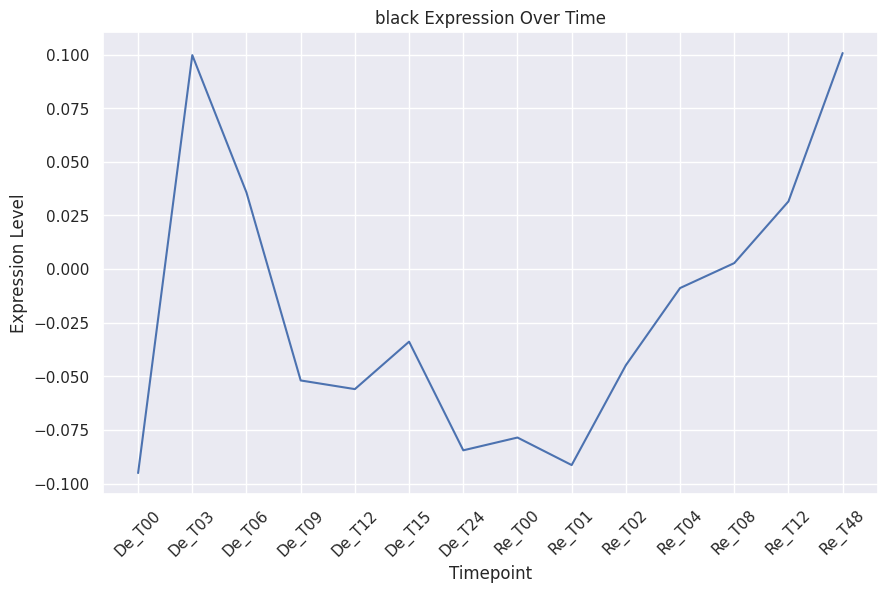

In [407]:
data_to_plot = median_df[['ref', 'black']].copy()  # Copying just to avoid SettingWithCopyWarning
data_to_plot.rename(columns={'ref': 'Timepoint', 'black': 'Expression'}, inplace=True)

# Set the style
sns.set_theme(style="darkgrid")

# Create a line plot
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='Timepoint', y='Expression', data=data_to_plot)

# Adding titles and labels
plt.title('black Expression Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Expression Level')

# Optionally, rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [418]:
# Step 1: Divide the numeric columns into 3 groups
groups = [
    ['darkred','salmon', 'darkgrey', 'lightsalmon'],
    ['rosybrown', 'midnightblue','saddlebrown', 'black'],
    ['peru', 'khaki','dimgrey', 'skyblue'],
    ['sandybrown','crimson','coral', 'firebrick','indianred','chocolate']
]
color_mapping = {module: module for module in sum(groups, [])}



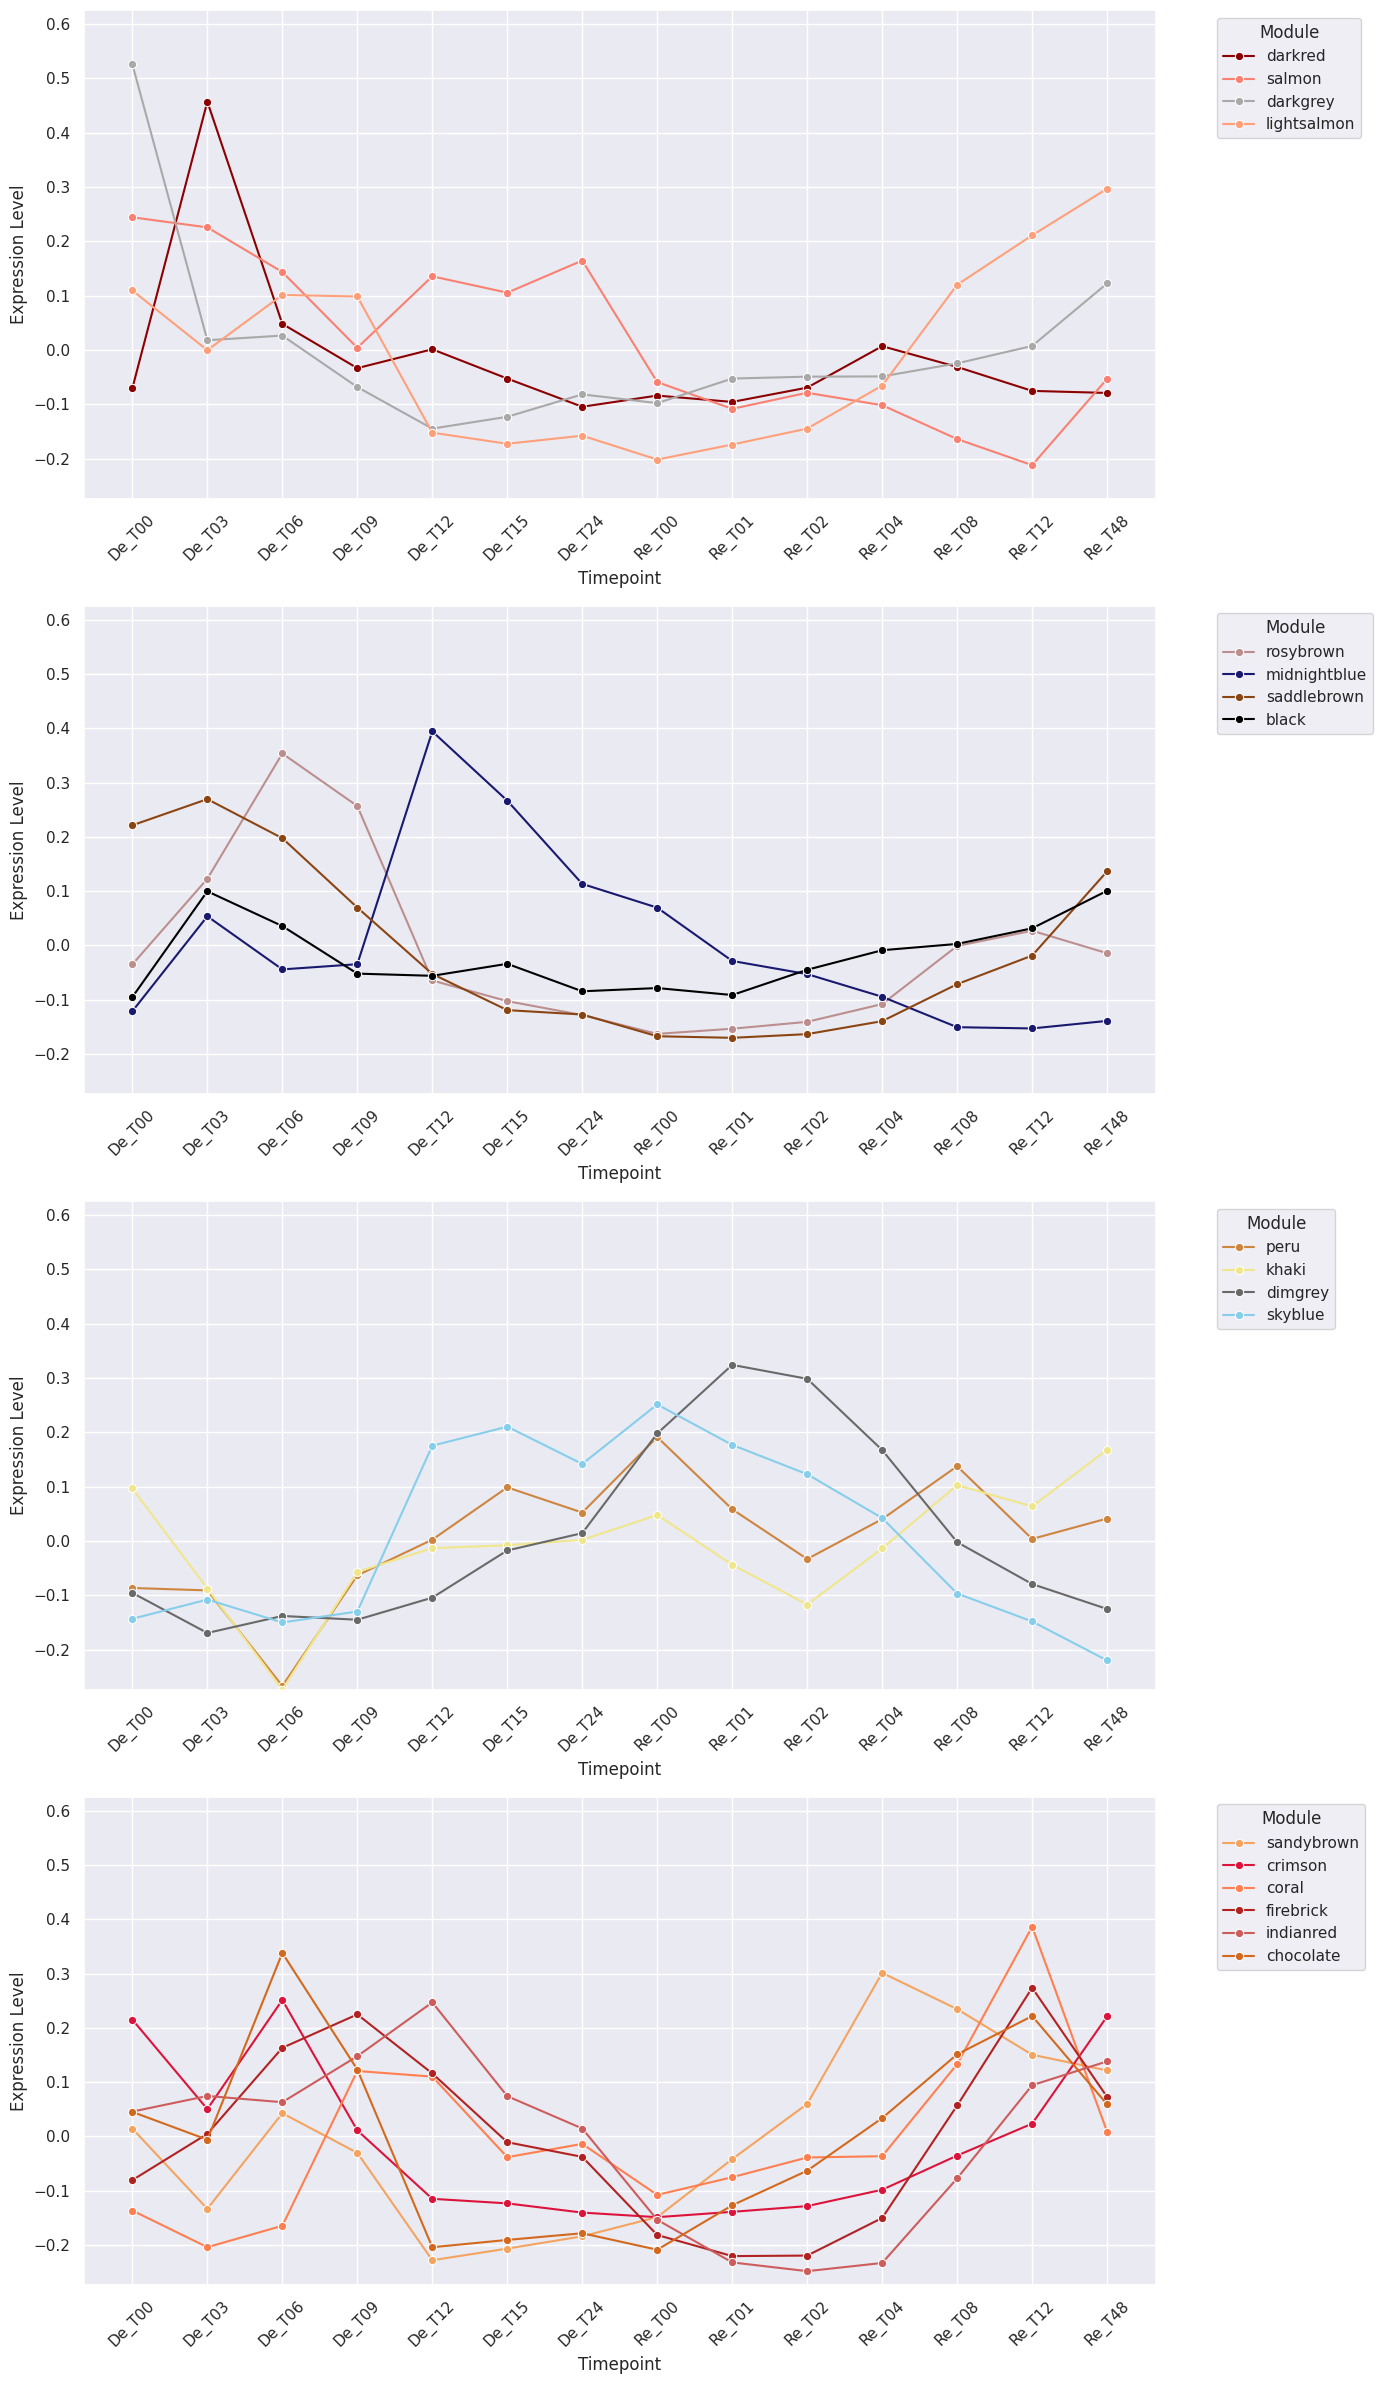

In [421]:

# Set the style
sns.set_theme(style="darkgrid")
global_min = median_df[sum(groups, [])].min().min() 
global_max = median_df[sum(groups, [])].max().max() + 0.1

# Create a figure for the subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 24))  # 3 rows, 1 column

for i, group in enumerate(groups):
    # Step 2: Convert the DataFrame from wide to long format for the current group
    long_format = pd.melt(median_df[group + ['ref']], id_vars=['ref'], var_name='Module', value_name='Expression')

    # Step 3: Create a line plot for the current group
    #sns.lineplot(ax=axes[i], x='ref', y='Expression', hue='Module', data=long_format, marker='o')
    sns.lineplot(ax=axes[i], x='ref', y='Expression', hue='Module', data=long_format, palette=color_mapping, marker='o')

    # Adding titles and labels
    #axes[i].set_title('Module Expression Over Time - Group {}'.format(i+1))
    axes[i].set_xlabel('Timepoint')
    axes[i].set_ylabel('Expression Level')
    # Set the same y-axis limits for all plots
    axes[i].set_ylim(global_min, global_max)
    # Optionally, rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Enhance legend readability
    axes[i].legend(title='Module', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

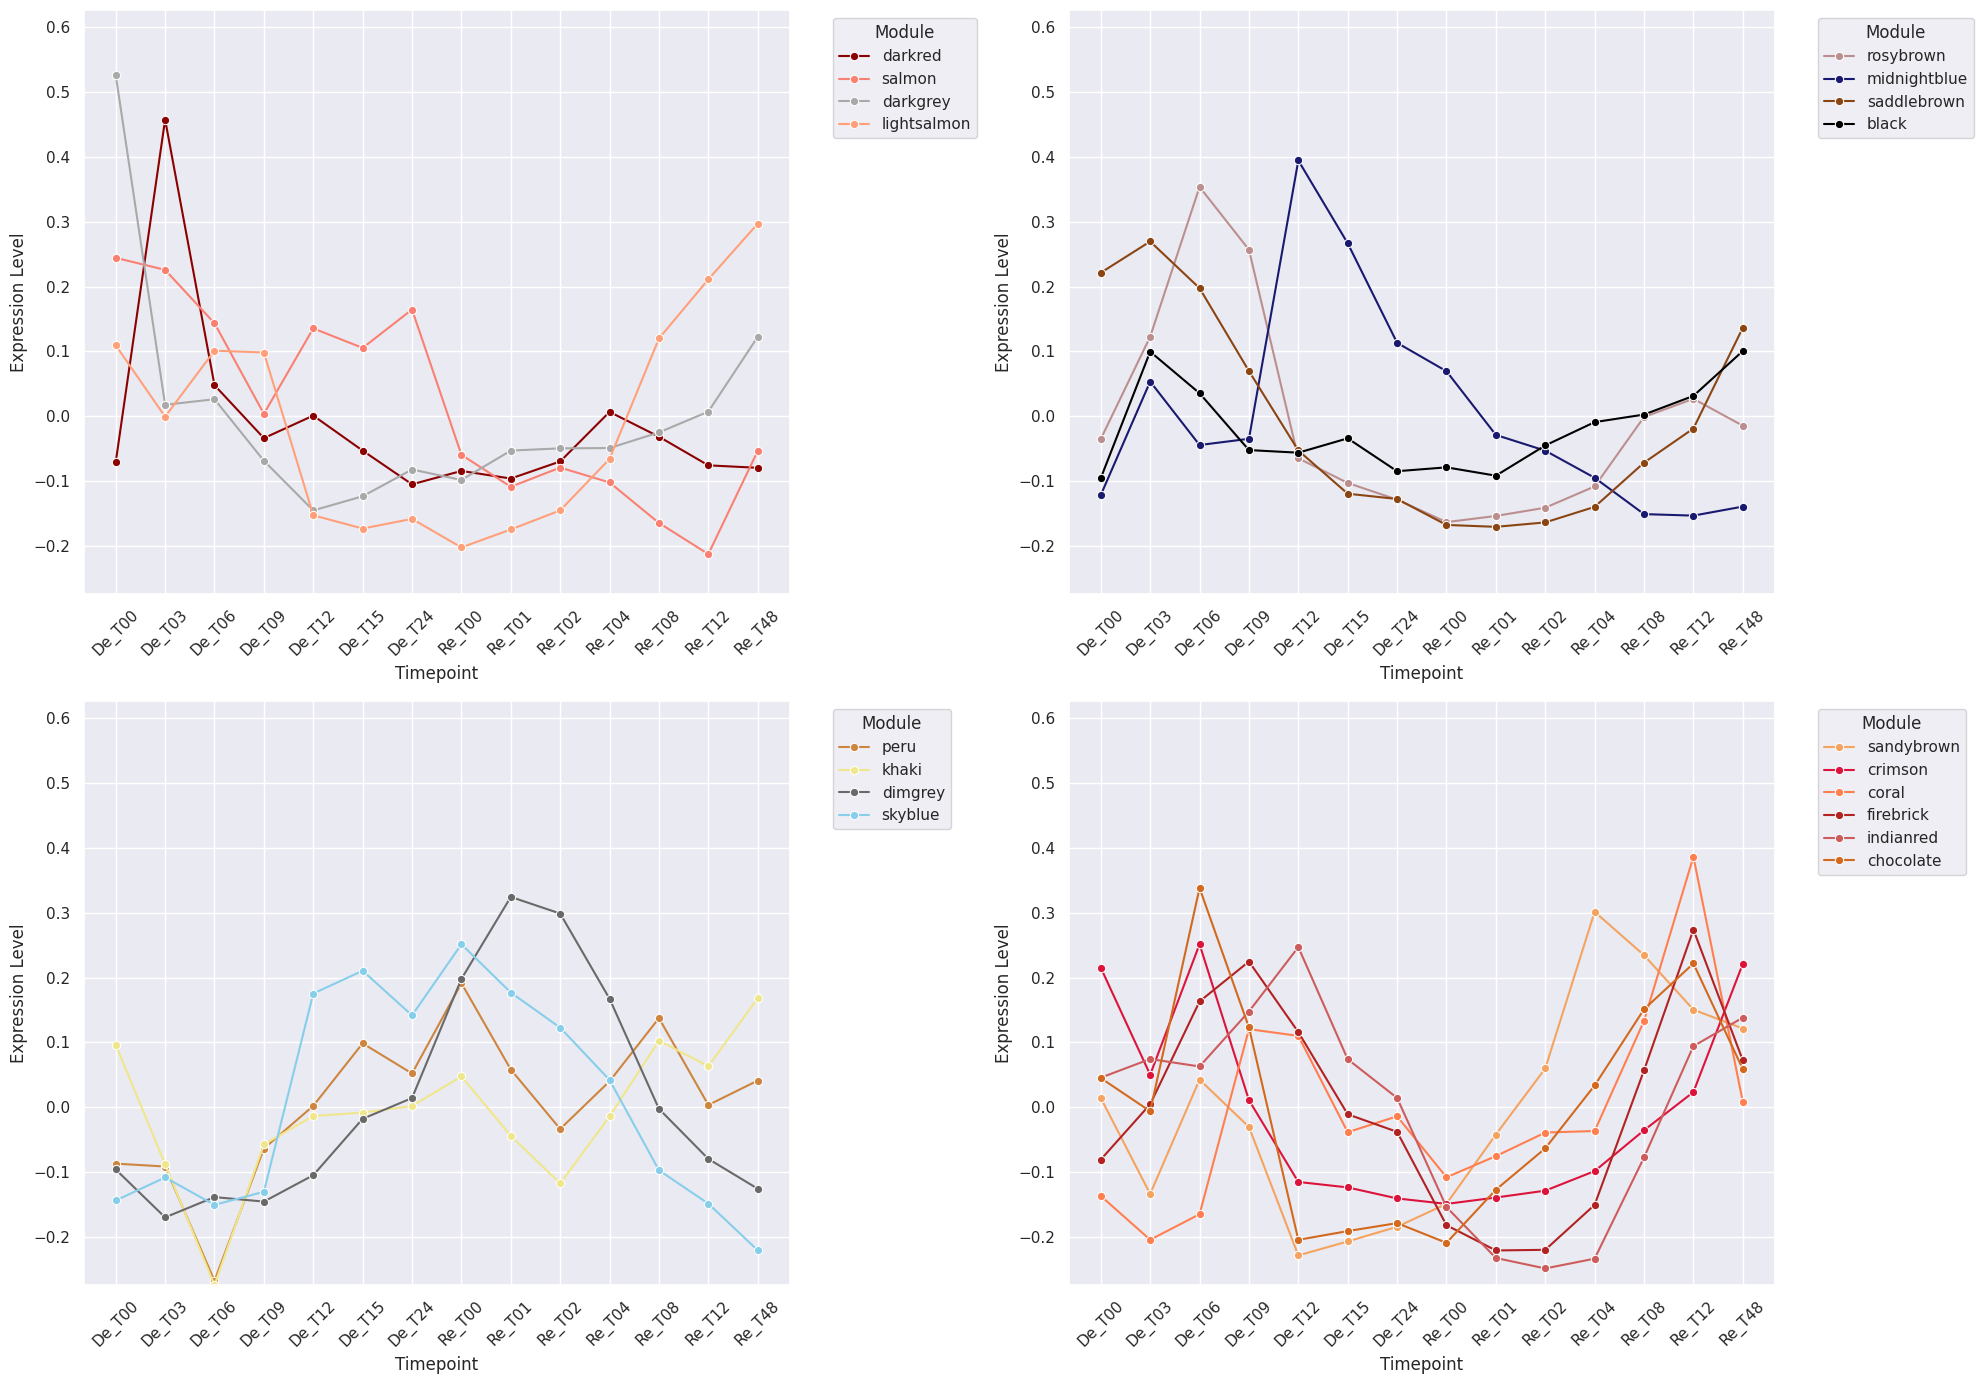

In [420]:

# Set the style
sns.set_theme(style="darkgrid")
# Determine global y-axis limits
global_min = median_df[sum(groups, [])].min().min() 
global_max = median_df[sum(groups, [])].max().max() + 0.1

# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # 2 rows, 2 columns, for a 2x2 grid
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, group in enumerate(groups):
    # Step 2: Convert the DataFrame from wide to long format for the current group
    long_format = pd.melt(median_df[group + ['ref']], id_vars=['ref'], var_name='Module', value_name='Expression')

    # Step 3: Create a line plot for the current group using the color mapping
    sns.lineplot(ax=axes[i], x='ref', y='Expression', hue='Module', data=long_format, palette=color_mapping, marker='o')

    # Adding titles and labels
    axes[i].set_xlabel('Timepoint')
    axes[i].set_ylabel('Expression Level')
    # Set the same y-axis limits for all plots
    axes[i].set_ylim(global_min, global_max)
    # Optionally, rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Enhance legend readability
    axes[i].legend(title='Module', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide unused axes if the number of groups is less than the number of subplots
if len(groups) < 4:
    for ax in axes[len(groups):]:
        ax.axis('off')

plt.tight_layout()
plt.show()
